# ML INTERNSHIP ASSIGNMENT

1.	Understanding the Problem

○	Restate the goal in your own words.

○	Show how you interpret the research paper’s concepts in this context.


2.	Data Inspection & Preprocessing

○	Load and clean the dataset.

○	Handle missing, duplicate, or inconsistent entries.

○	Parse event_time and ensure correct data types.


In [6]:
import pandas as pd
import numpy as np

# Step 1: Load the dataset
file_path = "events.csv"
df = pd.read_csv(file_path)

# Step 2: Inspect the dataset
print("Initial Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nFirst 5 rows:")
print(df.head())

# Step 3: Handle missing values

print("\nMissing Values:")
print(df.isnull().sum())



Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB
None

Summary Statistics:
         product_id   category_id          price       user_id
count  8.851290e+05  8.851290e+05  885129.000000  8.851290e+05
mean   1.906621e+06  2.144423e+18     146.328713  1.515916e+18
std    1.458708e+06  6.165105e+14     296.807683  3.554165e+07
min    1.020000e+02  2.144416e+1

In [7]:
# Remove rows where the 'user_session' column has missing values
if 'user_session' in df.columns:
    print(f"Number of missing values in 'user_session' before cleanup: {df['user_session'].isnull().sum()}")
    df = df[df['user_session'].notnull()]
    print(f"Number of missing values in 'user_session' after cleanup: {df['user_session'].isnull().sum()}")


# Step 4: Handle duplicate entries

print("\nNumber of duplicate rows:", df.duplicated().sum())

Number of missing values in 'user_session' before cleanup: 165
Number of missing values in 'user_session' after cleanup: 0

Number of duplicate rows: 652


In [8]:
# Cannot Remove duplicates as it might be if a customer is repeatedly vising for a particular product


# Step 5: Handle inconsistent entries 
if 'event_type' in df.columns:  
    df['event_type'] = df['event_type'].str.lower().str.strip()
    
if 'category_code' in df.columns:  
    df['category_code'] = df['category_code'].str.lower().str.strip()
    
if 'brand' in df.columns:  
    df['brand'] = df['brand'].str.lower().str.strip()
    


In [9]:
# Step 6: Parse event_time and ensure correct data types
if 'event_time' in df.columns: 
    
    df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')

    # Check for and handle invalid datetime entries
    invalid_times = df['event_time'].isnull().sum()
    if invalid_times > 0:
        print(f"\nInvalid datetime entries found: {invalid_times}")
        df = df[df['event_time'].notnull()]  # Drop rows with invalid datetime

In [10]:

# Step 7: Ensure correct data types for other columns
# Example: Converting numeric columns to proper types
for column in df.select_dtypes(include='object').columns:
    try:
        df[column] = pd.to_numeric(df[column], errors='ignore')
    except ValueError:
        print(f"Could not convert column {column} to numeric.")

# Final Dataset Info
print("\nFinal Dataset Info:")
print(df.info())

# Save the cleaned dataset (Optional)
cleaned_file_path = "cleaned_events.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")

/tmp/ipykernel_6200/750657626.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[column] = pd.to_numeric(df[column], errors='ignore')



Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 884964 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     884964 non-null  datetime64[ns, UTC]
 1   event_type     884964 non-null  object             
 2   product_id     884964 non-null  int64              
 3   category_id    884964 non-null  int64              
 4   category_code  648792 non-null  object             
 5   brand          672638 non-null  object             
 6   price          884964 non-null  float64            
 7   user_id        884964 non-null  int64              
 8   user_session   884964 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 67.5+ MB
None

Cleaned dataset saved to: cleaned_events.csv


3.	Exploratory Data Analysis (EDA)

○	Event distributions (view, cart, purchase) over time.

○	Brand and category popularity.

○	User-level summaries (total spend, frequency of visits, time between visits, etc.).


          1. Event Distributions (view, cart, purchase) Over Time


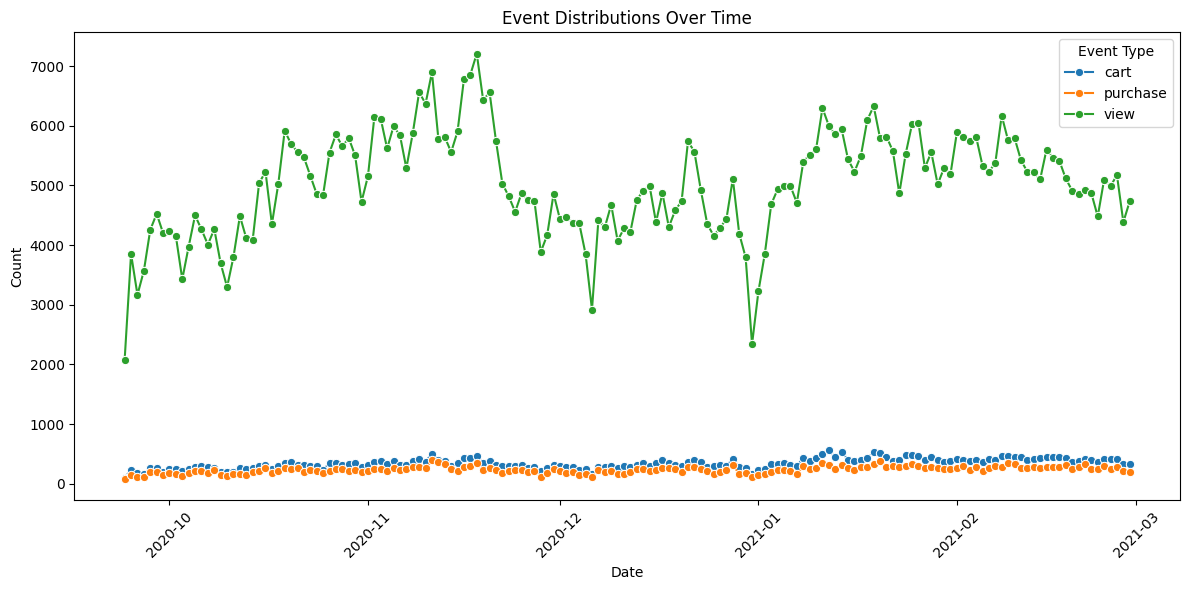

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure event_time is a datetime object
df['event_time'] = pd.to_datetime(df['event_time'])

# Group by event type and time (daily or monthly)
event_distribution = df.groupby([df['event_time'].dt.date, 'event_type']).size().reset_index(name='count')

# Plot the event distribution
plt.figure(figsize=(12, 6))
sns.lineplot(data=event_distribution, x='event_time', y='count', hue='event_type', marker='o')
plt.title('Event Distributions Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()


              2. Brand and Category Popularity


/tmp/ipykernel_6200/1427507676.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_popularity.head(10), x='count', y='brand', palette='viridis')


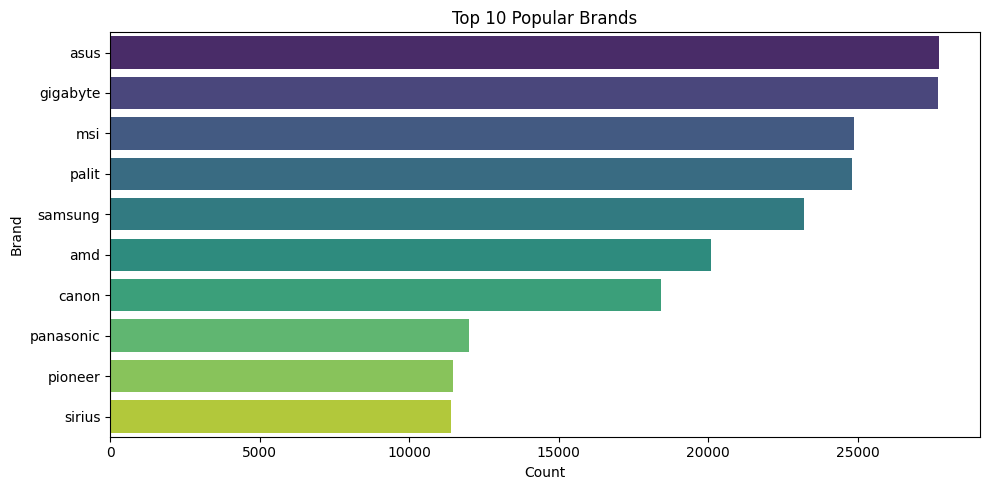

In [12]:
# Group by brand and count events
brand_popularity = df.groupby('brand').size().reset_index(name='count').sort_values(by='count', ascending=False)

# Top 10 brands visualization
plt.figure(figsize=(10, 5))
sns.barplot(data=brand_popularity.head(10), x='count', y='brand', palette='viridis')
plt.title('Top 10 Popular Brands')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


Average popularity for brands: 673.31


/tmp/ipykernel_6200/2092158177.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brands_close_to_avg, x='count', y='brand', palette='Blues')


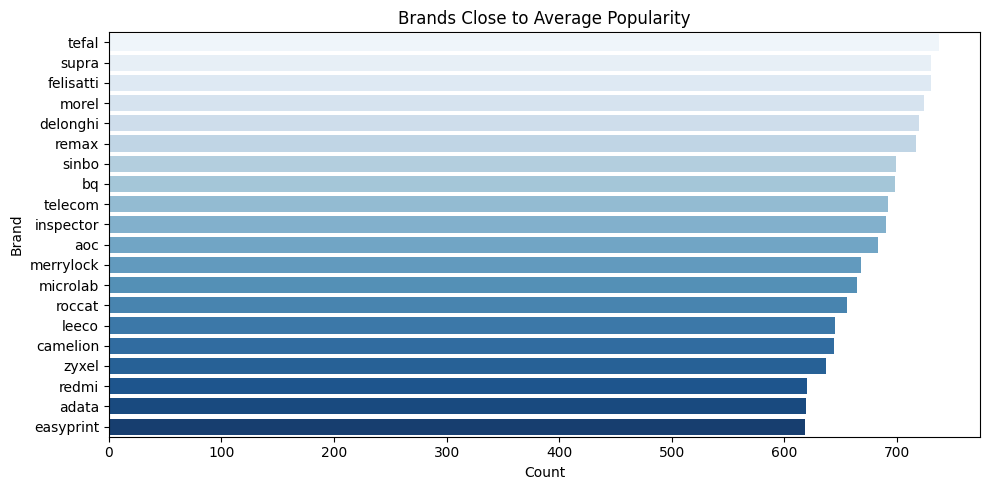

In [13]:
# Calculate average popularity for brands
average_brand_popularity = brand_popularity['count'].mean()
print(f"Average popularity for brands: {average_brand_popularity:.2f}")

# Highlight brands close to the average popularity
brands_close_to_avg = brand_popularity[
    (brand_popularity['count'] >= average_brand_popularity * 0.9) & 
    (brand_popularity['count'] <= average_brand_popularity * 1.1)
]

# Visualization for brands close to average popularity
plt.figure(figsize=(10, 5))
sns.barplot(data=brands_close_to_avg, x='count', y='brand', palette='Blues')
plt.title('Brands Close to Average Popularity')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


/tmp/ipykernel_6200/1850465188.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=least_popular_brands, x='count', y='brand', palette='Reds_r')


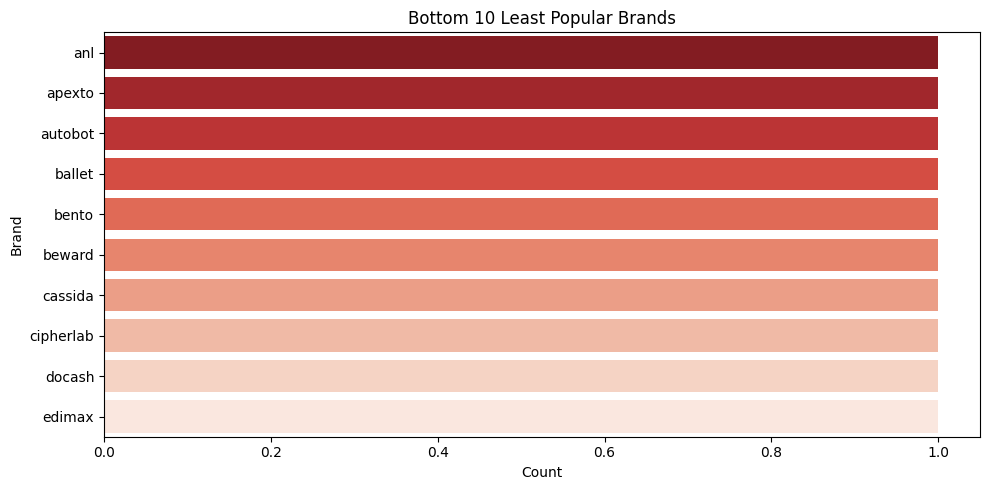

In [14]:
# Group by brand and count events
brand_popularity = df.groupby('brand').size().reset_index(name='count')

# Get the bottom 10 least popular brands
least_popular_brands = brand_popularity.nsmallest(10, 'count')

# Visualization for least popular brands
plt.figure(figsize=(10, 5))
sns.barplot(data=least_popular_brands, x='count', y='brand', palette='Reds_r')
plt.title('Bottom 10 Least Popular Brands')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


/tmp/ipykernel_6200/563100331.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_popularity.head(10), x='count', y='category_code', palette='coolwarm')


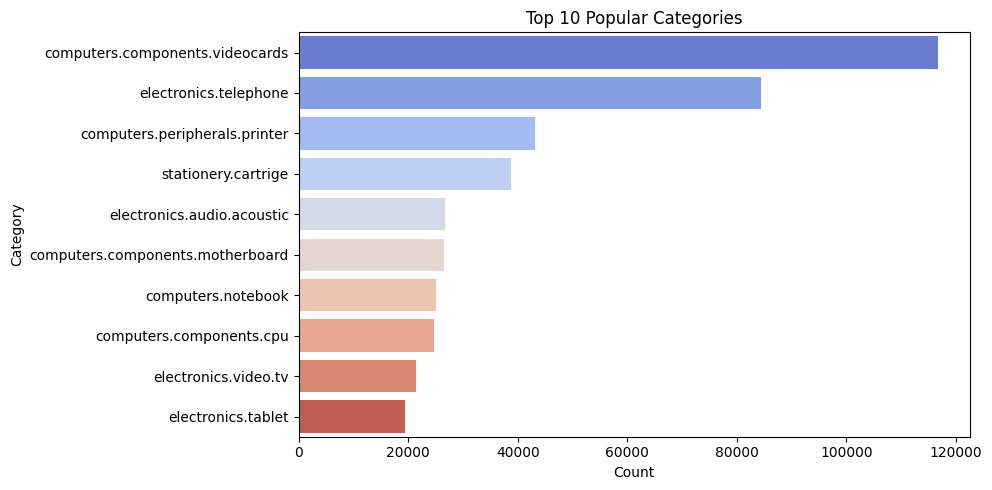

In [15]:
# Group by category and count events
category_popularity = df.groupby('category_code').size().reset_index(name='count').sort_values(by='count', ascending=False)

# Top 10 categories visualization
plt.figure(figsize=(10, 5))
sns.barplot(data=category_popularity.head(10), x='count', y='category_code', palette='coolwarm')
plt.title('Top 10 Popular Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


Average popularity for categories: 6063.48


/tmp/ipykernel_6200/900270171.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=categories_close_to_avg, x='count', y='category_code', palette='Greens')


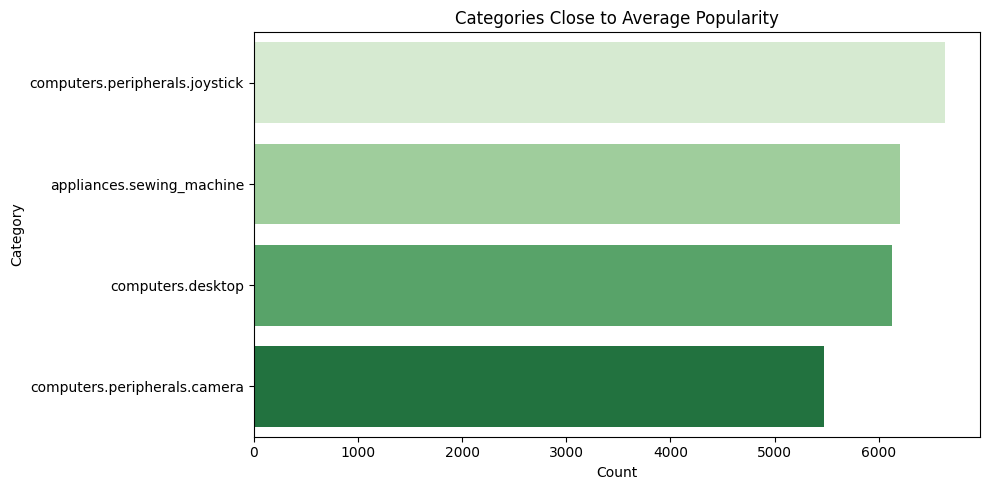

In [16]:
# Calculate average popularity for categories
average_category_popularity = category_popularity['count'].mean()
print(f"Average popularity for categories: {average_category_popularity:.2f}")

# Highlight categories close to the average popularity
categories_close_to_avg = category_popularity[
    (category_popularity['count'] >= average_category_popularity * 0.9) & 
    (category_popularity['count'] <= average_category_popularity * 1.1)
]

# Visualization for categories close to average popularity
plt.figure(figsize=(10, 5))
sns.barplot(data=categories_close_to_avg, x='count', y='category_code', palette='Greens')
plt.title('Categories Close to Average Popularity')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


/tmp/ipykernel_6200/2220705415.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=least_popular_categories, x='count', y='category_code', palette='Oranges_r')


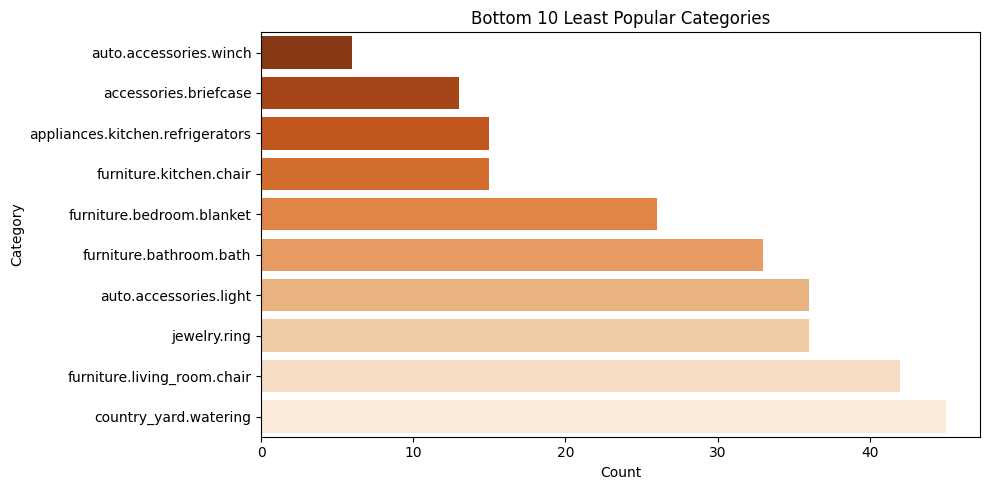

In [17]:
# Group by category and count events
category_popularity = df.groupby('category_code').size().reset_index(name='count')

# Get the bottom 10 least popular categories
least_popular_categories = category_popularity.nsmallest(10, 'count')

# Visualization for least popular categories
plt.figure(figsize=(10, 5))
sns.barplot(data=least_popular_categories, x='count', y='category_code', palette='Oranges_r')
plt.title('Bottom 10 Least Popular Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


              3. User-Level Summaries

Total Spend per User:

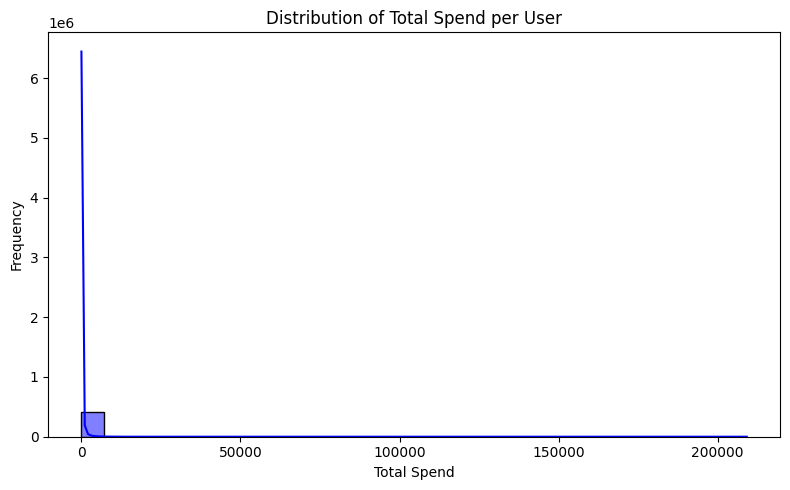

In [18]:
# Calculate total spend per user
user_total_spend = df.groupby('user_id')['price'].sum().reset_index().rename(columns={'price': 'total_spend'})

# Visualize the distribution of total spend
plt.figure(figsize=(8, 5))
sns.histplot(user_total_spend['total_spend'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Spend per User')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Frequency of Visits:

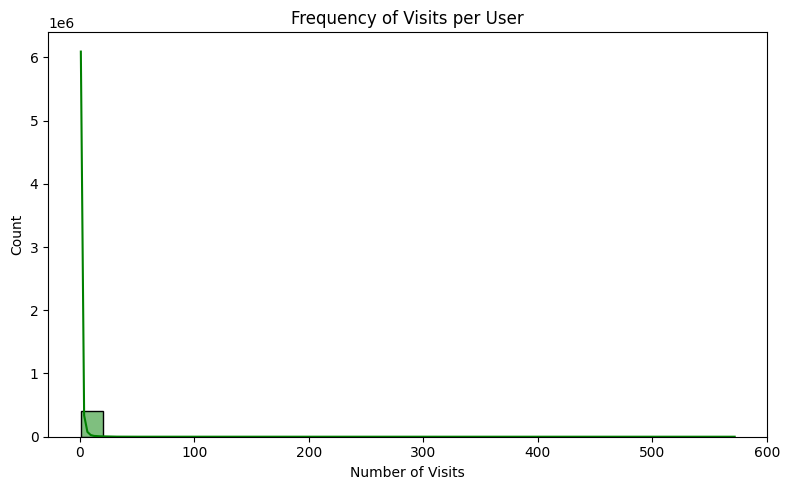

In [19]:
# Count the number of visits/events per user
user_frequency = df.groupby('user_id').size().reset_index(name='frequency')

# Visualize the distribution of user visit frequency
plt.figure(figsize=(8, 5))
sns.histplot(user_frequency['frequency'], bins=30, kde=True, color='green')
plt.title('Frequency of Visits per User')
plt.xlabel('Number of Visits')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Time Between Visits:

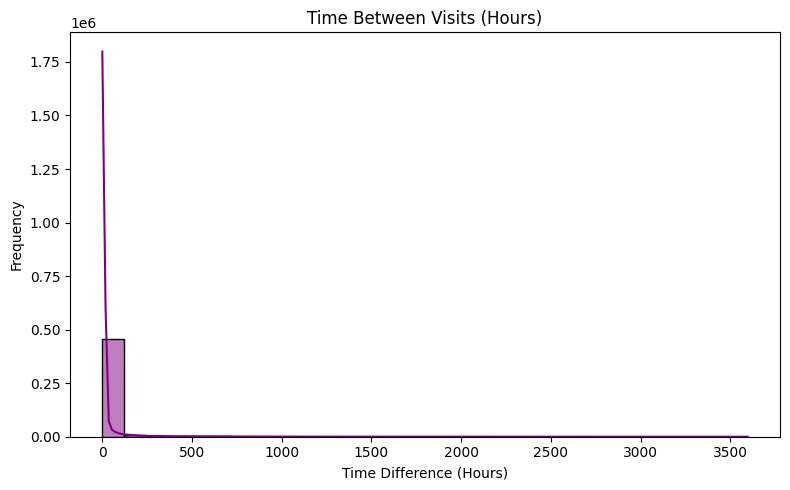

In [20]:
# Calculate time between visits per user
df = df.sort_values(by=['user_id', 'event_time'])
df['time_diff'] = df.groupby('user_id')['event_time'].diff()

# Convert timedelta to hours and visualize
time_diff_hours = df['time_diff'].dt.total_seconds() / 3600  # Convert to hours
plt.figure(figsize=(8, 5))
sns.histplot(time_diff_hours.dropna(), bins=30, kde=True, color='purple')
plt.title('Time Between Visits (Hours)')
plt.xlabel('Time Difference (Hours)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


4.	Defining Churn

○	Propose a threshold-based or time-based definition (e.g., no purchase in last 30 days).

○	Justify the choice with logical or business-based reasoning.


In [21]:
import pandas as pd

# Ensure the dataset is sorted by user_id and event_time
df = df.sort_values(by=['user_id', 'event_time'])

# Define the last purchase date for each user
last_purchase_date = df[df['event_type'] == 'purchase'].groupby('user_id')['event_time'].max()

# Define churn threshold (e.g., 30 days)
churn_threshold_days = 30

# Ensure both sides of the comparison are timezone-aware
threshold_date = pd.Timestamp.now(tz='UTC') - pd.Timedelta(days=churn_threshold_days)

# Identify churned customers
churned_customers = last_purchase_date[last_purchase_date < threshold_date].index

# Create a churn flag in the original dataset
df['churn_flag'] = df['user_id'].isin(churned_customers).astype(int)

# Display churned users
churned_summary = df[df['churn_flag'] == 1].groupby('user_id').agg({
    'event_time': ['min', 'max'],
    'event_type': 'count'
}).reset_index()
churned_summary.columns = ['user_id', 'first_event', 'last_event', 'event_count']

print(churned_summary.head())


               user_id               first_event                last_event  \
0  1515915625353286099 2020-10-03 11:20:33+00:00 2020-10-23 14:40:01+00:00   
1  1515915625353457259 2020-09-29 05:51:33+00:00 2020-09-29 05:52:55+00:00   
2  1515915625353534622 2020-10-06 08:29:35+00:00 2020-10-15 13:52:37+00:00   
3  1515915625353561691 2020-11-24 17:34:42+00:00 2020-11-25 09:26:59+00:00   
4  1515915625353900095 2020-09-27 14:07:36+00:00 2020-10-18 04:14:46+00:00   

   event_count  
0           11  
1            3  
2           10  
3           10  
4           40  


In [22]:
print(churned_summary)


                   user_id               first_event  \
0      1515915625353286099 2020-10-03 11:20:33+00:00   
1      1515915625353457259 2020-09-29 05:51:33+00:00   
2      1515915625353534622 2020-10-06 08:29:35+00:00   
3      1515915625353561691 2020-11-24 17:34:42+00:00   
4      1515915625353900095 2020-09-27 14:07:36+00:00   
...                    ...                       ...   
21299  1515915625610995356 2021-02-28 20:34:26+00:00   
21300  1515915625610997879 2021-02-28 20:46:11+00:00   
21301  1515915625610999486 2021-02-28 20:53:23+00:00   
21302  1515915625611008742 2021-02-28 21:43:20+00:00   
21303  1515915625611011782 2021-02-28 22:05:07+00:00   

                     last_event  event_count  
0     2020-10-23 14:40:01+00:00           11  
1     2020-09-29 05:52:55+00:00            3  
2     2020-10-15 13:52:37+00:00           10  
3     2020-11-25 09:26:59+00:00           10  
4     2020-10-18 04:14:46+00:00           40  
...                         ...          ... 

Churned Users Summary Statistics:
            user_id   event_count  event_duration
count  2.130400e+04  21304.000000    21304.000000
mean   1.515916e+18      8.777507        3.933815
std    3.459948e+07     11.728147       13.218802
min    1.515916e+18      1.000000        0.000000
25%    1.515916e+18      4.000000        0.000000
50%    1.515916e+18      6.000000        0.000000
75%    1.515916e+18      9.000000        0.000000
max    1.515916e+18    339.000000      151.000000


/tmp/ipykernel_6200/1474145519.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duration_counts.index, y=duration_counts.values, palette='viridis')


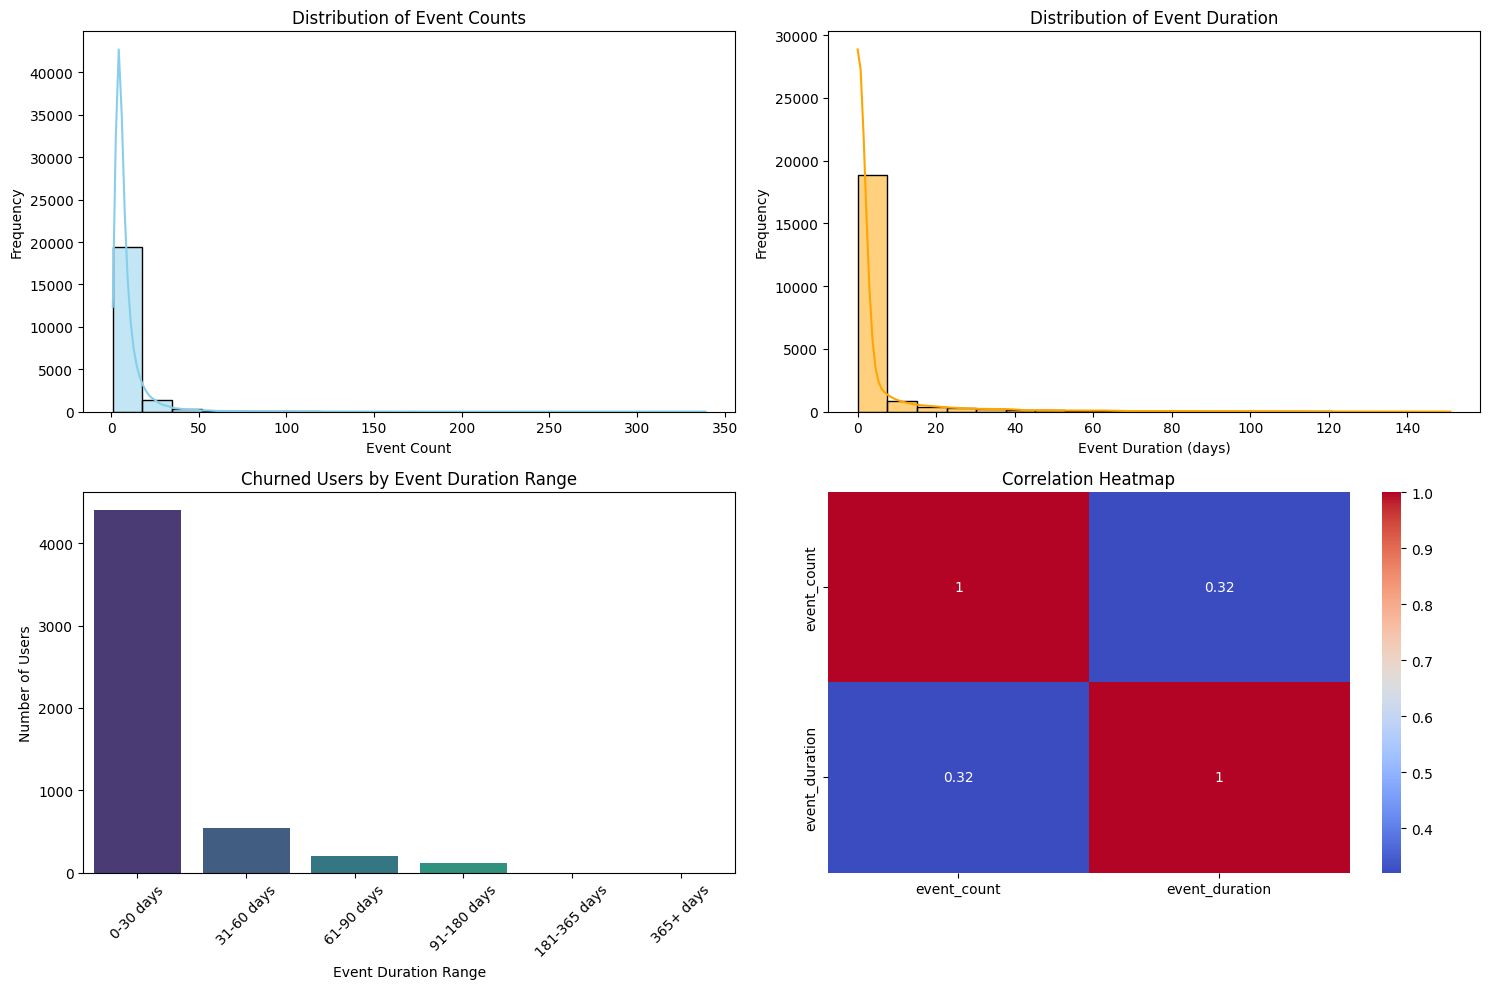

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert first_event and last_event to datetime if not already
churned_summary['first_event'] = pd.to_datetime(churned_summary['first_event'])
churned_summary['last_event'] = pd.to_datetime(churned_summary['last_event'])

# Add duration column
churned_summary['event_duration'] = (churned_summary['last_event'] - churned_summary['first_event']).dt.days

# 1. Summary Statistics
print("Churned Users Summary Statistics:")
print(churned_summary.describe())

# 2. Visualizations
plt.figure(figsize=(15, 10))

# Histogram of event counts
plt.subplot(2, 2, 1)
sns.histplot(churned_summary['event_count'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Event Counts")
plt.xlabel("Event Count")
plt.ylabel("Frequency")

# Histogram of event duration
plt.subplot(2, 2, 2)
sns.histplot(churned_summary['event_duration'], bins=20, kde=True, color='orange')
plt.title("Distribution of Event Duration")
plt.xlabel("Event Duration (days)")
plt.ylabel("Frequency")

# Bar chart for churned users by event duration ranges
plt.subplot(2, 2, 3)
churned_summary['duration_category'] = pd.cut(
    churned_summary['event_duration'], 
    bins=[0, 30, 60, 90, 180, 365, float('inf')], 
    labels=["0-30 days", "31-60 days", "61-90 days", "91-180 days", "181-365 days", "365+ days"]
)
duration_counts = churned_summary['duration_category'].value_counts().sort_index()
sns.barplot(x=duration_counts.index, y=duration_counts.values, palette='viridis')
plt.title("Churned Users by Event Duration Range")
plt.xlabel("Event Duration Range")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)

# Correlation heatmap
plt.subplot(2, 2, 4)
correlation_data = churned_summary[['event_count', 'event_duration']].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.show()


In [24]:

# Filter only churned customers based on the churned_summary 'user_id'
churned_users = churned_summary['user_id'].unique()
churned_data = df[df['user_id'].isin(churned_users)]

# Compute the number of unique category_code interactions for each churned customer
category_summary = churned_data.groupby('user_id')['category_code'].nunique().reset_index()
category_summary.rename(columns={'category_code': 'categories_code'}, inplace=True)

# Merge back with churned_summary
churned_summary = churned_summary.merge(category_summary, on='user_id', how='left')

# Fill any missing categories_code values with 0 (if there are users without category interactions)
churned_summary['categories_code'].fillna(0, inplace=True)

# View updated churned_summary
print(churned_summary.head())


               user_id               first_event                last_event  \
0  1515915625353286099 2020-10-03 11:20:33+00:00 2020-10-23 14:40:01+00:00   
1  1515915625353457259 2020-09-29 05:51:33+00:00 2020-09-29 05:52:55+00:00   
2  1515915625353534622 2020-10-06 08:29:35+00:00 2020-10-15 13:52:37+00:00   
3  1515915625353561691 2020-11-24 17:34:42+00:00 2020-11-25 09:26:59+00:00   
4  1515915625353900095 2020-09-27 14:07:36+00:00 2020-10-18 04:14:46+00:00   

   event_count  event_duration duration_category  categories_code  
0           11              20         0-30 days                1  
1            3               0               NaN                1  
2           10               9         0-30 days                1  
3           10               0               NaN                1  
4           40              20         0-30 days                5  


/tmp/ipykernel_6200/1338083944.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churned_summary['categories_code'].fillna(0, inplace=True)


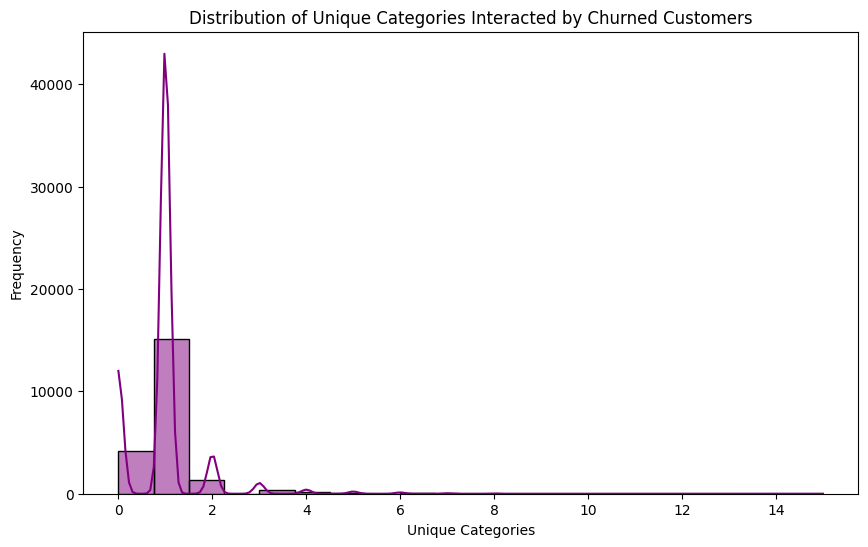

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of categories_code
plt.figure(figsize=(10, 6))
sns.histplot(churned_summary['categories_code'], bins=20, kde=True, color='purple')
plt.title("Distribution of Unique Categories Interacted by Churned Customers")
plt.xlabel("Unique Categories")
plt.ylabel("Frequency")
plt.show()


In [26]:
# Count interactions per customer
customer_interactions = df.groupby('user_id').size().reset_index(name='interaction_count')

# Separate duplicate and unique customers
duplicates = customer_interactions[customer_interactions['interaction_count'] > 1]
unique_customers = customer_interactions[customer_interactions['interaction_count'] == 1]

print(f"Number of duplicate customers: {len(duplicates)}")
print(f"Number of unique customers: {len(unique_customers)}")

# Filter the original dataframe for each group
duplicates_data = df[df['user_id'].isin(duplicates['user_id'])]
unique_data = df[df['user_id'].isin(unique_customers['user_id'])]


Number of duplicate customers: 140833
Number of unique customers: 266404


In [27]:
# EDA for duplicate customers
print("Duplicate Customers:")
print(duplicates_data.describe(include='all'))

# Event distribution for duplicates
duplicates_event_dist = duplicates_data['event_type'].value_counts(normalize=True)
print("\nEvent distribution for duplicate customers:")
print(duplicates_event_dist)

# EDA for unique customers
print("\nUnique Customers:")
print(unique_data.describe(include='all'))

# Event distribution for unique customers
unique_event_dist = unique_data['event_type'].value_counts(normalize=True)
print("\nEvent distribution for unique customers:")
print(unique_event_dist)


Duplicate Customers:
                                 event_time event_type    product_id  \
count                                618560     618560  6.185600e+05   
unique                                  NaN          3           NaN   
top                                     NaN       view           NaN   
freq                                    NaN     527545           NaN   
mean    2020-12-16 04:28:59.317280512+00:00        NaN  1.970570e+06   
min               2020-09-24 11:57:26+00:00        NaN  1.020000e+02   
25%               2020-11-08 08:17:41+00:00        NaN  7.430240e+05   
50%        2020-12-17 15:01:20.500000+00:00        NaN  1.529422e+06   
75%               2021-01-24 12:15:03+00:00        NaN  3.791079e+06   
max               2021-02-28 23:59:09+00:00        NaN  4.183880e+06   
std                                     NaN        NaN  1.479088e+06   

         category_id                    category_code     brand  \
count   6.185600e+05                           

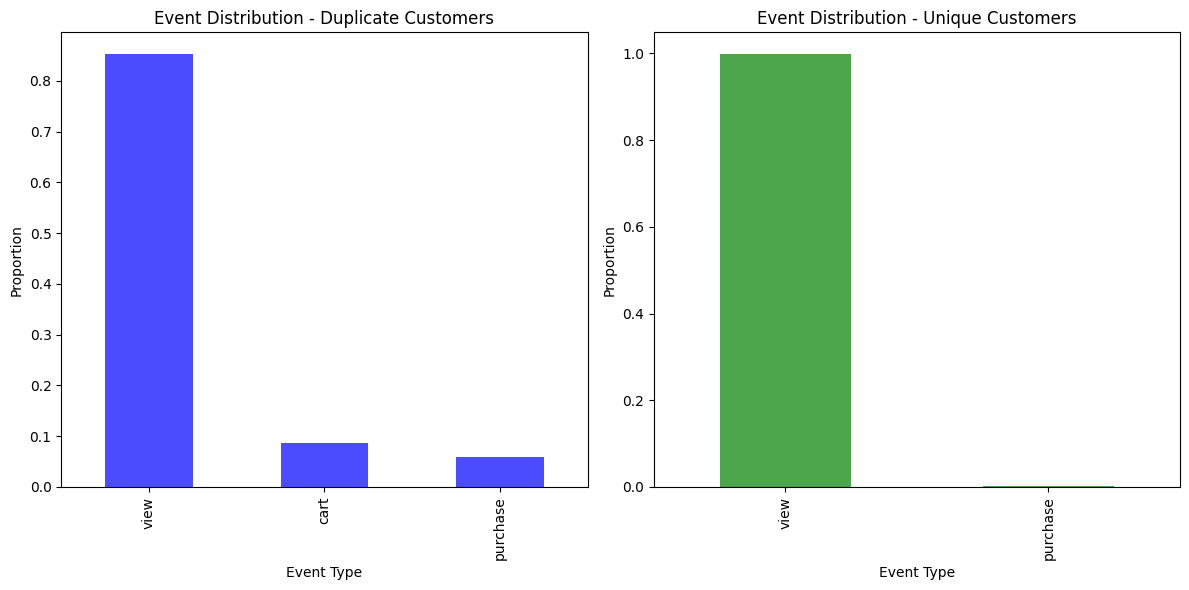

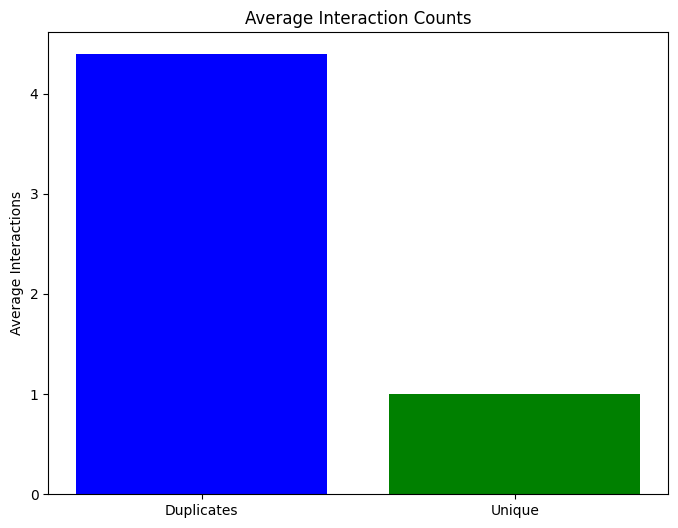

In [28]:
# Compare event distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Event distribution for duplicates
plt.subplot(1, 2, 1)
duplicates_event_dist.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Event Distribution - Duplicate Customers")
plt.ylabel("Proportion")
plt.xlabel("Event Type")

# Event distribution for unique customers
plt.subplot(1, 2, 2)
unique_event_dist.plot(kind='bar', color='green', alpha=0.7)
plt.title("Event Distribution - Unique Customers")
plt.ylabel("Proportion")
plt.xlabel("Event Type")

plt.tight_layout()
plt.show()

# Compare average interaction counts
plt.figure(figsize=(8, 6))
plt.bar(['Duplicates', 'Unique'], [duplicates['interaction_count'].mean(), 1], color=['blue', 'green'])
plt.title("Average Interaction Counts")
plt.ylabel("Average Interactions")
plt.show()


In [29]:
# Filter purchases only
purchases = df[df['event_type'] == 'purchase']

# Count purchases per customer
customer_purchase_counts = purchases.groupby('user_id').size().reset_index(name='purchase_count')

# Identify regular customers (purchased more than twice)
regular_customers = customer_purchase_counts[customer_purchase_counts['purchase_count'] > 2]

# Filter original data for regular customers
regular_customers_data = purchases[purchases['user_id'].isin(regular_customers['user_id'])]

print(f"Number of regular customers (purchased more than twice): {len(regular_customers)}")



Number of regular customers (purchased more than twice): 3414


In [30]:
# We already have the regular customers, now identify if they made more than two purchases
regular_customers_data_count = regular_customers_data.groupby('user_id').size().reset_index(name='purchase_count')

# Customers who made purchases more than twice will be regular, others are churned
churned_customers = regular_customers_data_count[regular_customers_data_count['purchase_count'] <= 2]

print(f"Number of churned regular customers: {len(churned_customers)}")



Number of churned regular customers: 0


Churned Customers Summary:
       user_id  purchase_count
count      0.0             0.0
mean       NaN             NaN
std        NaN             NaN
min        NaN             NaN
25%        NaN             NaN
50%        NaN             NaN
75%        NaN             NaN
max        NaN             NaN


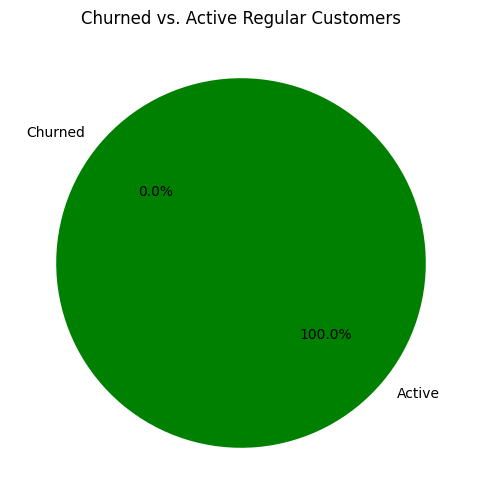

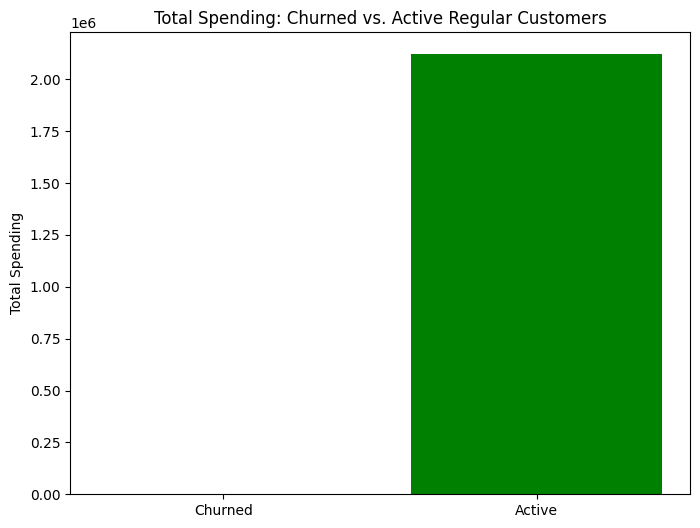

/tmp/ipykernel_6200/376870477.py:32: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  churned_purchase_dates.dt.to_period('M').value_counts().sort_index().plot(kind='bar', color='orange')


IndexError: index 0 is out of bounds for axis 0 with size 0

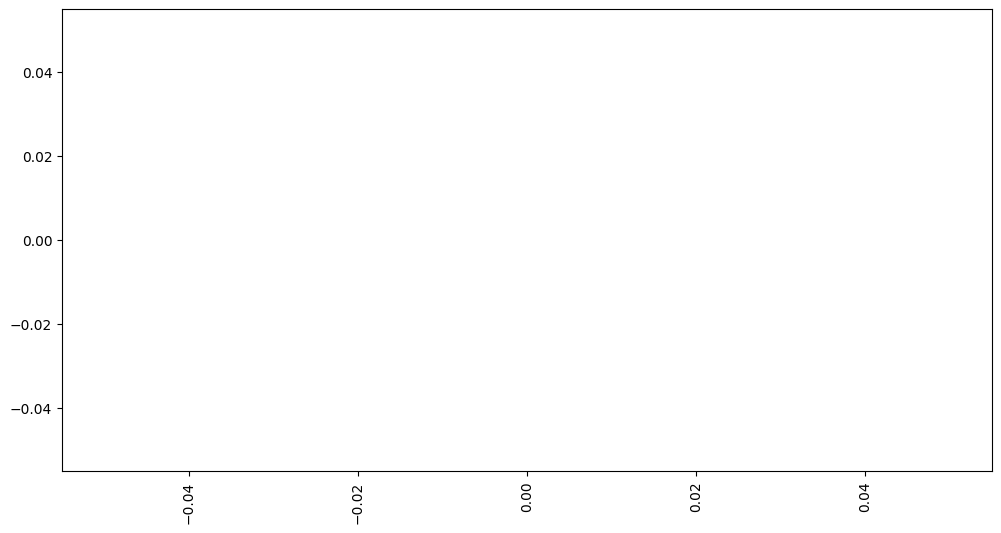

In [31]:
import matplotlib.pyplot as plt

# Analyze churned customers
churned_summary = churned_customers.describe(include='all')
print("Churned Customers Summary:")
print(churned_summary)

# Compare churned vs. active regular customers
active_customers = regular_customers_data_count[regular_customers_data_count['purchase_count'] > 2]

# Plot the proportion of churned vs. active customers
churn_status = [len(churned_customers), len(active_customers)]
labels = ['Churned', 'Active']
plt.figure(figsize=(8, 6))
plt.pie(churn_status, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title("Churned vs. Active Regular Customers")
plt.show()

# Analyze spending patterns for churned vs. active regular customers
churned_spending = purchases[purchases['user_id'].isin(churned_customers['user_id'])]['price'].sum()
active_spending = purchases[purchases['user_id'].isin(active_customers['user_id'])]['price'].sum()

plt.figure(figsize=(8, 6))
plt.bar(['Churned', 'Active'], [churned_spending, active_spending], color=['red', 'green'])
plt.title("Total Spending: Churned vs. Active Regular Customers")
plt.ylabel("Total Spending")
plt.show()

# Time distribution of churned customers
churned_purchase_dates = purchases[purchases['user_id'].isin(churned_customers['user_id'])]['event_time']
plt.figure(figsize=(12, 6))
churned_purchase_dates.dt.to_period('M').value_counts().sort_index().plot(kind='bar', color='orange')
plt.title("Monthly Purchase Distribution of Churned Customers")
plt.xlabel("Month")
plt.ylabel("Number of Purchases")
plt.show()



                   user_id  purchase_count
18394  1515915625601579158              56
14285  1515915625591659523              49
16491  1515915625596534847              45
19072  1515915625604175669              43
19338  1515915625605054644              42
17745  1515915625599634258              39
1211   1515915625521745364              36
18941  1515915625603840072              33
18679  1515915625603113992              28
7397   1515915625540197343              24
6431   1515915625537999341              24
15319  1515915625594005201              24
16353  1515915625596222123              24
20363  1515915625607988732              24
2669   1515915625526571951              23
6531   1515915625538189543              22
15809  1515915625595075217              21
17122  1515915625598030639              21
2742   1515915625526745191              21
9835   1515915625550039142              20


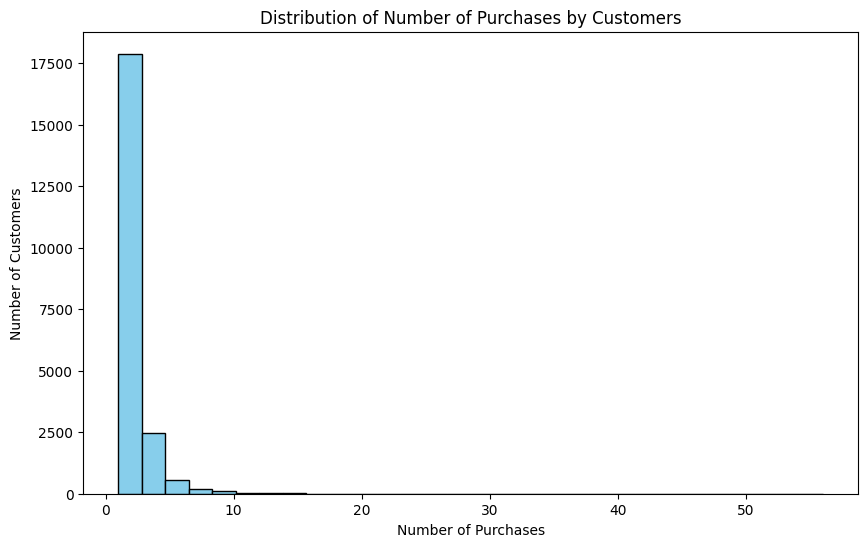

In [32]:
# Step 1: Count how many times each customer has made a purchase
purchase_counts = df[df['event_type'] == 'purchase'].groupby('user_id').size().reset_index(name='purchase_count')

# Step 2: Sort the customers based on the number of purchases from high to low
sorted_purchase_counts = purchase_counts.sort_values(by='purchase_count', ascending=False)

# Display the sorted results
print(sorted_purchase_counts.head(20))  # Print top 20 customers with the most purchases

# You can also visualize the distribution of purchase counts if needed
plt.figure(figsize=(10, 6))
plt.hist(sorted_purchase_counts['purchase_count'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Number of Purchases by Customers")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.show()


In [33]:
# Step 1: Filter customers who have made more than 10 purchases
customer_purchase_counts = df[df['event_type'] == 'purchase'].groupby('user_id').size()
regular_customers = customer_purchase_counts[customer_purchase_counts > 10].index

# Filter original dataset to include only these regular customers
regular_customer_data = df[df['user_id'].isin(regular_customers)]

# Step 2: Sort the data by user_id and event_time to ensure order of purchases
regular_customer_data = regular_customer_data.sort_values(by=['user_id', 'event_time'])

# Step 3: Calculate the time difference between consecutive purchases for each customer
regular_customer_data['purchase_time_diff'] = regular_customer_data.groupby('user_id')['event_time'].diff()

# Step 4: Calculate the average, minimum, and maximum time difference for customers with more than 10 purchases
purchase_time_stats = regular_customer_data.groupby('user_id')['purchase_time_diff'].agg(['mean', 'min', 'max'])

# Step 5: Compute the overall statistics (mean, min, max) across all customers
overall_avg_time_diff = purchase_time_stats['mean'].mean()
overall_min_time_diff = purchase_time_stats['min'].min()
overall_max_time_diff = purchase_time_stats['max'].max()

print(f"Average timespan between orders for customers with more than 10 orders: {overall_avg_time_diff}")
print(f"Minimum timespan between orders: {overall_min_time_diff}")
print(f"Maximum timespan between orders: {overall_max_time_diff}")


Average timespan between orders for customers with more than 10 orders: 0 days 05:30:29.235431676
Minimum timespan between orders: 0 days 00:00:00
Maximum timespan between orders: 76 days 20:44:44


In [29]:
# Step 1: Filter customers who have made more than 10 purchases
customer_purchase_counts = df[df['event_type'] == 'purchase'].groupby('user_id').size()
regular_customers = customer_purchase_counts[customer_purchase_counts > 10].index

# Filter original dataset to include only these regular customers
regular_customer_data = df[df['user_id'].isin(regular_customers)]

# Step 2: Sort the data by user_id and event_time to ensure order of purchases
regular_customer_data = regular_customer_data.sort_values(by=['user_id', 'event_time'])

# Step 3: Calculate the time difference between consecutive purchases for each customer
regular_customer_data['purchase_time_diff'] = regular_customer_data.groupby('user_id')['event_time'].diff()

# Step 4: Calculate the mean, median, and mode of time differences for customers with more than 10 purchases
time_diff_mean = regular_customer_data['purchase_time_diff'].mean()
time_diff_median = regular_customer_data['purchase_time_diff'].median()
time_diff_mode = regular_customer_data['purchase_time_diff'].mode()[0]  # Mode returns a series, we take the first mode value

# Print the results
print(f"Mean timespan between purchases: {time_diff_mean}")
print(f"Median timespan between purchases: {time_diff_median}")
print(f"Mode timespan between purchases: {time_diff_mode}")


Mean timespan between purchases: 0 days 05:04:43.875507442
Median timespan between purchases: 0 days 00:00:40
Mode timespan between purchases: 0 days 00:00:00


In [34]:
import pandas as pd

# Get the latest purchase date
latest_purchase_date = df[df['event_type'] == 'purchase']['event_time'].max()

# Define the threshold for churned customers (customers who haven't made a purchase in the last 76 days)
churn_threshold = latest_purchase_date - pd.Timedelta(days=76)

# Step 1: Identify customers who have not made a purchase in the last 76 days
customers_last_purchase = df[df['event_type'] == 'purchase'].groupby('user_id')['event_time'].max()

# Step 2: Mark those who have not purchased in the last 76 days as churned (1), others as not churned (0)
customers_last_purchase = customers_last_purchase[customers_last_purchase < churn_threshold]

# Step 3: Add the 'churned' column to the original dataframe
df['churned'] = df['user_id'].apply(lambda x: 0 if x in customers_last_purchase.index else 1)

# Step 4: Show the result
print(df[['user_id', 'churned']].drop_duplicates())


                    user_id  churned
174670  1515915625353226922        1
51155   1515915625353230067        1
242211  1515915625353230683        1
33840   1515915625353230922        1
21986   1515915625353234047        1
...                     ...      ...
885123  1515915625611023671        1
885124  1515915625611023730        1
885125  1515915625611024014        1
885126  1515915625611024020        1
885127  1515915625611024030        1

[407237 rows x 2 columns]


In [35]:
# Step 1: Filter only churned customers (those with churned == 1)
churned_customers = df[df['churned'] == 1]

# Step 2: Print the churned customers
print(churned_customers[['user_id', 'churned']].drop_duplicates())


                    user_id  churned
174670  1515915625353226922        1
51155   1515915625353230067        1
242211  1515915625353230683        1
33840   1515915625353230922        1
21986   1515915625353234047        1
...                     ...      ...
885123  1515915625611023671        1
885124  1515915625611023730        1
885125  1515915625611024014        1
885126  1515915625611024020        1
885127  1515915625611024030        1

[397154 rows x 2 columns]


In [36]:
# Step 1: Filter only regular customers (those with churned == 0)
regular_customers = df[df['churned'] == 0]

# Step 2: Print the regular customers
print(regular_customers[['user_id', 'churned']].drop_duplicates())


                    user_id  churned
38819   1515915625353286099        0
19081   1515915625353457259        0
51667   1515915625353534622        0
346483  1515915625353561691        0
12200   1515915625353900095        0
...                     ...      ...
444086  1515915625563185552        0
444248  1515915625563198110        0
444266  1515915625563198904        0
444334  1515915625563202056        0
444373  1515915625563205927        0

[10083 rows x 2 columns]


Step 1: Import Libraries

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


Step 2: Prepare the Dataset

In [ ]:
# Step 1: Filter only churned customers
# churned_customers = df[df['churned'] == 1]

# Step 2: Aggregate features for each customer
customer_features = df.groupby('user_id').agg(
    total_purchases=('event_type', lambda x: (x == 'purchase').sum()),  # Total purchases
    total_events=('event_type', 'count'),  # Total events
    average_time_between_purchases=('event_time', lambda x: x.diff().dt.days.mean()),  # Average time between purchases
    last_purchase_date=('event_time', lambda x: x[x.index[-1]]),  # Date of the last event
    category_diversity=('category_code', lambda x: x.nunique()),  # Number of unique categories
    brand_diversity=('brand', lambda x: x.nunique()),  # Number of unique brands
    total_spend=('price', 'sum')  # Total amount spent
).reset_index()

# Step 3: Add the churned status
customer_features = customer_features.merge(
    churned_customers[['user_id', 'churned']].drop_duplicates(),
    on='user_id',
    how='left'
)

# Fill missing churned values with 0 (non-churned customers)
customer_features['churned'] = customer_features['churned'].fillna(0).astype(int)

# Step 4: Remove unnecessary columns if anya
customer_features = customer_features.dropna()  # Drop rows with missing values

# Step 5: Print the prepared dataset
print(customer_features.head())


                user_id  total_purchases  total_events  \
2   1515915625353230683                0            13   
4   1515915625353234047                0            36   
5   1515915625353236157                0             4   
9   1515915625353286099                1            11   
10  1515915625353294441                0            97   

    average_time_between_purchases        last_purchase_date  \
2                         2.666667 2020-12-12 10:33:09+00:00   
4                         3.942857 2021-02-18 09:11:44+00:00   
5                         2.333333 2021-02-11 16:10:01+00:00   
9                         1.700000 2020-10-23 14:40:01+00:00   
10                        1.343750 2021-02-18 11:59:33+00:00   

    category_diversity  brand_diversity  total_spend  churned  
2                    2                9       814.93        1  
4                    2                8      5481.90        1  
5                    1                4       179.60        1  
9         